<a href="https://colab.research.google.com/github/chanakyaitgithub/cnn_image_classifier/blob/main/cnn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip uninstall tensorflow


Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.14.0


In [2]:
pip install tensorflow==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 59.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing

In [22]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import BatchNormalization,Dropout
from keras.constraints import maxnorm


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
cifar=keras.datasets.cifar10
(train_image,train_class),(test_image,test_class)=cifar.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
class_ids=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

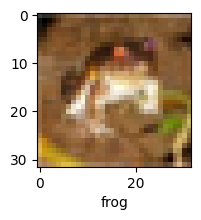

In [57]:
def image_show(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(class_ids[y[index][0]])
image_show(train_image,train_class,0)

In [7]:
train_image=train_image/255.0
test_image=test_image/255.0

In [26]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_27 (ModuleWra (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
module_wrapper_28 (ModuleWra (None, 8, 8, 64)         

In [27]:
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(128,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 16, 16, 32)        0         
_________________________________________________________________
module_wrapper_27 (ModuleWra (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
module_wrapper_28 (ModuleWra (None, 8, 8, 64)         

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history=model.fit(train_image,train_class,epochs=20,validation_data=(test_image,test_class))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 178s 113ms/step - loss: 1.5680 - accuracy: 0.4406 - val_loss: 1.2718 - val_accuracy: 0.5539
Epoch 2/20
1563/1563 [==============================] - 167s 107ms/step - loss: 1.1678 - accuracy: 0.5844 - val_loss: 0.9837 - val_accuracy: 0.6483
Epoch 3/20
1563/1563 [==============================] - 168s 107ms/step - loss: 1.0095 - accuracy: 0.6445 - val_loss: 0.8667 - val_accuracy: 0.6933
Epoch 4/20
1563/1563 [==============================] - 169s 108ms/step - loss: 0.9297 - accuracy: 0.6755 - val_loss: 0.7839 - val_accuracy: 0.7292
Epoch 5/20
1563/1563 [==============================] - 170s 109ms/step - loss: 0.8785 - accuracy: 0.6943 - val_loss: 0.8345 - val_accuracy: 0.7161
Epoch 6/20
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8324 - accuracy: 0.7079 - val_loss: 0.7652 - val_accuracy: 0.7335
Epoch 7/20
1563/1563 [==============================] - 167s 107ms/step - loss: 0.7982 - accuracy: 0.7218 - val_loss: 0.795

In [40]:
history=model.fit(train_image,train_class,epochs=5,validation_data=(test_image,test_class))

Epoch 1/5
1563/1563 [==============================] - 170s 109ms/step - loss: 0.7153 - accuracy: 0.7539 - val_loss: 0.7191 - val_accuracy: 0.7512
Epoch 2/5
1563/1563 [==============================] - 170s 109ms/step - loss: 0.6583 - accuracy: 0.7703 - val_loss: 0.7169 - val_accuracy: 0.7521
Epoch 3/5
1563/1563 [==============================] - 168s 108ms/step - loss: 0.6343 - accuracy: 0.7830 - val_loss: 0.6479 - val_accuracy: 0.7826
Epoch 4/5
1563/1563 [==============================] - 171s 110ms/step - loss: 0.6211 - accuracy: 0.7853 - val_loss: 0.6602 - val_accuracy: 0.7714
Epoch 5/5
1563/1563 [==============================] - 171s 109ms/step - loss: 0.6136 - accuracy: 0.7860 - val_loss: 0.5587 - val_accuracy: 0.8086


In [42]:
test_loss,test_accuracy=model.evaluate(test_image,test_class,verbose=2)
print(test_accuracy*100,"%")

313/313 - 8s - loss: 0.5587 - accuracy: 0.8086
80.86000084877014 %


predicted :--------------- airplane


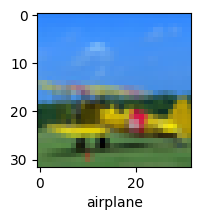

In [65]:
predictions=model.predict(test_image)
print("predicted :---------------",class_ids[np.argmax(predictions[44])])
image_show(test_image,test_class,44)

